In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import train datastet
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# Checking for missing values
def find_missing(train,test):
    count_missing_train=train.isnull().sum().values
    count_missing_test=test.isnull().sum().values
    total_train=train.shape[0]
    total_test=test.shape[0]
    ratio_missing_train=count_missing_train/total_train*100
    ratio_missing_test=count_missing_test/total_test*100
    return pd.DataFrame({'Missing_train':count_missing_train,'Missing_Ratio_train':ratio_missing_train,
                        'Missing_test':count_missing_test,'Missing_Ratio_test':ratio_missing_test},
                       index=train.columns)
df_missing=find_missing(train.drop(columns='SalePrice',axis=1),test)
df_missing=df_missing[df_missing['Missing_Ratio_train']>0].sort_values(by='Missing_Ratio_train',ascending=False)

In [5]:
df_missing.head(7)

,Missing_train,Missing_Ratio_train,Missing_test,Missing_Ratio_test
PoolQC,1453,99.520548,1456,99.794380
MiscFeature,1406,96.301370,1408,96.504455
Alley,1369,93.767123,1352,92.666210
Fence,1179,80.753425,1169,80.123372
FireplaceQu,690,47.260274,730,50.034270
LotFrontage,259,17.739726,227,15.558602
GarageType,81,5.547945,76,5.209047


In [6]:
from sklearn.metrics import r2_score,mean_squared_error
# Print R2 and RMSE scores
def get_score(prediction,labels):
    print('R2:{}'.format(r2_score(prediction,labels)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(prediction,labels))))

# Shows scores of training and validation sets
def train_test(estimator,x_train,x_test,y_train,y_test):
    prediction_train=estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    prediction_test=estimator.predict(x_test)
    print("TEST")
    get_score(prediction_test,y_test)

In [7]:
# Splitting to features and target
train_target=train.iloc[:,-1].values
features=pd.concat([train.drop(columns='SalePrice'),test],keys=['Train','Test'])

In [8]:
features.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  \
Train 0         Lvl    AllPub      ...                 0        0    NaN   
      1         Lvl    AllPub      ...                 0        0    NaN   
      2         Lvl    AllPub      ...                 0        0    NaN   
      3         Lvl    AllPub      ...                 0        0    NaN   
      4         Lvl    AllPub      ...                 0        0    NaN   

        Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
Train 0   NaN         NaN       0      2    2008        WD         Normal  
      1   NaN         NaN       0      5    2007        WD         Normal  
      2   NaN         NaN       0      9    2008        WD         Normal  
      3   NaN         NaN       0      2    2006        WD        Abnorml  
      4   NaN         NaN       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [9]:
# Delete some features which are not correspond to the sales price and also whose features contains lots of missing values
features.drop(columns=['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']
             ,axis=1,inplace=True)

In [10]:
features.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour LotConfig      ...       FireplaceQu GarageType  \
Train 0         Lvl    Inside      ...               NaN     Attchd   
      1         Lvl       FR2      ...                TA     Attchd   
      2         Lvl    Inside      ...                TA     Attchd   
      3         Lvl    Corner      ...                Gd     Detchd   
      4         Lvl       FR2      ...                TA     Attchd   

        GarageFinish GarageCars GarageQual PavedDrive  MoSold  YrSold  \
Train 0          RFn        2.0         TA          Y       2    2008   
      1          RFn        2.0         TA          Y       5    2007   
      2          RFn        2.0         TA          Y       9    2008   
      3          Unf        3.0         TA          Y       2    2006   
      4          RFn        3.0         TA          Y      12    2008   

         SaleType  SaleCondition  
Train 0        WD         Normal  
      1        WD         Normal  
      2        WD         Normal  
      3        WD        Abnorml  
      4        WD         Normal  

[5 rows x 56 columns]

In [11]:
numerics=['int16','int32','int64','float16','float32','float64']
df_numerics=features.select_dtypes(include=numerics)
df_numerics.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
Train 0   1          60         65.0     8450            7            5   
      1   2          20         80.0     9600            6            8   
      2   3          60         68.0    11250            7            5   
      3   4          70         60.0     9550            7            5   
      4   5          60         84.0    14260            8            5   

         YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF   ...    GrLivArea  \
Train 0       2003          2003        856.0       856   ...         1710   
      1       1976          1976       1262.0      1262   ...         1262   
      2       2001          2002        920.0       920   ...         1786   
      3       1915          1970        756.0       961   ...         1717   
      4       2000          2000       1145.0      1145   ...         2198   

         FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
Train 0         2         1             3             1             8   
      1         2         0             3             1             6   
      2         2         1             3             1             6   
      3         1         0             3             1             7   
      4         2         1             4             1             9   

         Fireplaces  GarageCars  MoSold  YrSold  
Train 0           0         2.0       2    2008  
      1           1         2.0       5    2007  
      2           1         2.0       9    2008  
      3           1         3.0       2    2006  
      4           1         3.0      12    2008  

[5 rows x 21 columns]

In [12]:
missing_values=[]
for c in df_numerics.columns:
    if df_numerics[c].isnull().sum()>0:
        missing_values.append(c)
missing_values

['LotFrontage', 'TotalBsmtSF', 'GarageCars']

In [25]:
df_numerics.loc[:,('LotFrontage','TotalBsmtSF','GarageCars')]

LotFrontage  TotalBsmtSF  GarageCars
Train 0       65.000000        856.0         2.0
      1       80.000000       1262.0         2.0
      2       68.000000        920.0         2.0
      3       60.000000        756.0         3.0
      4       84.000000       1145.0         3.0
      5       85.000000        796.0         2.0
      6       75.000000       1686.0         2.0
      7       69.305795       1107.0         2.0
      8       51.000000        952.0         2.0
      9       50.000000        991.0         1.0
      10      70.000000       1040.0         1.0
      11      85.000000       1175.0         3.0
      12      69.305795        912.0         1.0
      13      91.000000       1494.0         3.0
      14      69.305795       1253.0         1.0
      15      51.000000        832.0         2.0
      16      69.305795       1004.0         2.0
      17      72.000000          0.0         2.0
      18      66.000000       1114.0         2.0
      19      70.000000       1029.0         1.0
      20     101.000000       1158.0         3.0
      21      57.000000        637.0         1.0
      22      75.000000       1777.0         2.0
      23      44.000000       1040.0         2.0
      24      69.305795       1060.0         1.0
      25     110.000000       1566.0         3.0
      26      60.000000        900.0         2.0
      27      98.000000       1704.0         3.0
      28      47.000000       1484.0         1.0
      29      60.000000        520.0         1.0
...                 ...          ...         ...
Test  1429    50.000000        641.0         1.0
      1430    75.000000        967.0         1.0
      1431    69.000000          0.0         0.0
      1432    50.000000        660.0         0.0
      1433    60.000000        216.0         0.0
      1434    41.000000       1573.0         2.0
      1435    44.000000       1594.0         2.0
      1436    69.000000       1625.0         2.0
      1437    65.000000       1664.0         2.0
      1438    70.000000       1491.0         2.0
      1439   140.000000       1128.0         2.0
      1440    69.305795       1632.0         2.0
      1441    69.305795       1381.0         2.0
      1442    95.000000       1728.0         3.0
      1443    88.000000       1838.0         3.0
      1444   125.000000          0.0         1.0
      1445    78.000000       1288.0         4.0
      1446    41.000000        264.0         1.0
      1447    58.000000        864.0         1.0
      1448    69.305795       1652.0         3.0
      1449    21.000000        630.0         0.0
      1450    21.000000        546.0         1.0
      1451    80.000000       1104.0         1.0
      1452    21.000000        546.0         1.0
      1453    21.000000        546.0         0.0
      1454    21.000000        546.0         0.0
      1455    21.000000        546.0         1.0
      1456   160.000000       1224.0         2.0
      1457    62.000000        912.0         0.0
      1458    74.000000        996.0         3.0

[2919 rows x 3 columns]

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df_numerics.loc[:,('LotFrontage','TotalBsmtSF','GarageCars')])
df_numerics.loc[:,('LotFrontage', 'TotalBsmtSF', 'GarageCars')]=imputer.transform(df_numerics.loc[:,('LotFrontage', 'TotalBsmtSF', 'GarageCars')])

C:\Users\limo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df_categorical=features.drop(columns=df_numerics.columns,axis=1)
df_categorical.head()

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Train 0       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
      1       RL   Pave   NaN      Reg         Lvl       FR2       Gtl   
      2       RL   Pave   NaN      IR1         Lvl    Inside       Gtl   
      3       RL   Pave   NaN      IR1         Lvl    Corner       Gtl   
      4       RL   Pave   NaN      IR1         Lvl       FR2       Gtl   

        Neighborhood Condition1 Condition2      ...      CentralAir  \
Train 0      CollgCr       Norm       Norm      ...               Y   
      1      Veenker      Feedr       Norm      ...               Y   
      2      CollgCr       Norm       Norm      ...               Y   
      3      Crawfor       Norm       Norm      ...               Y   
      4      NoRidge       Norm       Norm      ...               Y   

        Electrical KitchenQual FireplaceQu GarageType GarageFinish GarageQual  \
Train 0      SBrkr          Gd         NaN     Attchd          RFn         TA   
      1      SBrkr          TA          TA     Attchd          RFn         TA   
      2      SBrkr          Gd          TA     Attchd          RFn         TA   
      3      SBrkr          Gd          Gd     Detchd          Unf         TA   
      4      SBrkr          Gd          TA     Attchd          RFn         TA   

        PavedDrive SaleType SaleCondition  
Train 0          Y       WD        Normal  
      1          Y       WD        Normal  
      2          Y       WD        Normal  
      3          Y       WD       Abnorml  
      4          Y       WD        Normal  

[5 rows x 35 columns]

In [15]:
missing_values=[]
for c in df_categorical.columns:
    if df_categorical[c].isnull().sum()>0:
        missing_values.append(c)
missing_values

['MSZoning',
 'Alley',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType']

In [16]:
# Filling NAs for categorical features
df_categorical['MSZoning']=df_categorical['MSZoning'].fillna(df_categorical['MSZoning'].mode()[0])
df_categorical['Alley']=df_categorical['Alley'].fillna('NOACCESS')
df_categorical['MasVnrType'] = df_categorical['MasVnrType'].fillna(df_categorical['MasVnrType'].mode()[0])
df_categorical['Exterior1st']=df_categorical['Exterior1st'].fillna(df_categorical['Exterior1st'].mode()[0])
df_categorical['Exterior2nd']=df_categorical['Exterior2nd'].fillna(df_categorical['Exterior2nd'].mode()[0])
for c in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_categorical[c] = df_categorical[c].fillna('NoBSMT')
df_categorical['Electrical'] = df_categorical['Electrical'].fillna(df_categorical['Electrical'].mode()[0])
df_categorical['KitchenQual'] = df_categorical['KitchenQual'].fillna(df_categorical['KitchenQual'].mode()[0])
df_categorical['FireplaceQu'] = df_categorical['FireplaceQu'].fillna('NoFP')
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df_categorical[col] = df_categorical[col].fillna('NoGRG')
df_categorical['SaleType'] = df_categorical['SaleType'].fillna(df_categorical['SaleType'].mode()[0])

In [17]:
features=pd.concat([df_numerics,df_categorical],axis=1)

In [18]:
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [19]:
features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
Train 0   1          60         65.0     8450            7            5   
      1   2          20         80.0     9600            6            8   
      2   3          60         68.0    11250            7            5   
      3   4          70         60.0     9550            7            5   
      4   5          60         84.0    14260            8            5   

         YearBuilt  YearRemodAdd  GrLivArea  FullBath   ...    Electrical  \
Train 0       2003          2003       1710         2   ...         SBrkr   
      1       1976          1976       1262         2   ...         SBrkr   
      2       2001          2002       1786         2   ...         SBrkr   
      3       1915          1970       1717         1   ...         SBrkr   
      4       2000          2000       2198         2   ...         SBrkr   

         KitchenQual  FireplaceQu  GarageType  GarageFinish  GarageQual  \
Train 0           Gd         NoFP      Attchd           RFn          TA   
      1           TA           TA      Attchd           RFn          TA   
      2           Gd           TA      Attchd           RFn          TA   
      3           Gd           Gd      Detchd           Unf          TA   
      4           Gd           TA      Attchd           RFn          TA   

         PavedDrive  SaleType SaleCondition TotalSF  
Train 0           Y        WD        Normal  2566.0  
      1           Y        WD        Normal  2524.0  
      2           Y        WD        Normal  2706.0  
      3           Y        WD       Abnorml  2473.0  
      4           Y        WD        Normal  3343.0  

[5 rows x 54 columns]

C:\Users\limo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


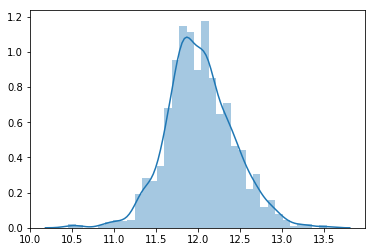

In [20]:
sns.distplot(np.log(train_target))

In [21]:
train_target=np.log(train_target)

In [22]:
# Label features encoding
conditions=set([x for x in features['Condition1']]+[x for x in features['Condition2']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(conditions))),
                       index=features.index,columns=conditions)
for i,cond in enumerate(zip(features['Condition1'],features['Condition2'])):
    dummies.ix[i, cond]=1
features=pd.concat([features,dummies.add_prefix('Condition_')],axis=1)
features.drop(columns=['Condition1','Condition2'],axis=1,inplace=True)

exteriors=set([x for x in features['Exterior1st']]+[x for x in features['Exterior2nd']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(exteriors))),
                    index=features.index,columns=exteriors)
for i,ext in enumerate(zip(features['Exterior1st'],features['Exterior2nd'])):
    dummies.ix[i,ext]=1
features=pd.concat([features,dummies.add_prefix('Exterior_')],axis=1)
features.drop(columns=['Exterior1st','Exterior2nd'],axis=1,inplace=True)

for c in features.dtypes[features.dtypes=='object'].index:
    for_dummy=features.pop(c)
    features=pd.concat([features,pd.get_dummies(for_dummy,prefix=c)],axis=1)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [23]:
features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
Train 0   1          60         65.0     8450            7            5   
      1   2          20         80.0     9600            6            8   
      2   3          60         68.0    11250            7            5   
      3   4          70         60.0     9550            7            5   
      4   5          60         84.0    14260            8            5   

         YearBuilt  YearRemodAdd  GrLivArea  FullBath          ...            \
Train 0       2003          2003       1710         2          ...             
      1       1976          1976       1262         2          ...             
      2       2001          2002       1786         2          ...             
      3       1915          1970       1717         1          ...             
      4       2000          2000       2198         2          ...             

         SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Train 0               0             0             0            1   
      1               0             0             0            1   
      2               0             0             0            1   
      3               0             0             0            1   
      4               0             0             0            1   

         SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Train 0                      0                      0                     0   
      1                      0                      0                     0   
      2                      0                      0                     0   
      3                      1                      0                     0   
      4                      0                      0                     0   

         SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Train 0                     0                     1                      0  
      1                     0                     1                      0  
      2                     0                     1                      0  
      3                     0                     0                      0  
      4                     0                     1                      0  

[5 rows x 222 columns]

In [24]:
# Using Elastic Net and GBoosing model
features_standard=features.copy()

train_features=features.loc['Train'].drop(columns='Id',axis=1).values
test_features=features.loc['Test'].drop(columns='Id',axis=1).values

train_features_st=features_standard.loc['Train'].drop(columns='Id',axis=1).values
test_features_st=features_standard.loc['Test'].drop(columns='Id',axis=1).values

In [25]:
# Feature scaling for Elastic Net model
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
train_features_st=sc_X.fit_transform(train_features_st)
test_features_st=sc_X.transform(test_features_st)

In [26]:
from sklearn.utils import shuffle
train_features_st,train_features,train_target=shuffle(train_features_st,train_features,train_target,random_state=0)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_features,train_target,test_size=0.2,random_state=0)
x_train_st,x_test_st,y_train_st,y_test_st=train_test_split(train_features_st,train_target,test_size=0.2,random_state=0)

In [39]:
from xgboost import XGBRegressor
XGB=XGBRegressor(max_depth=8,n_estimators=1000,min_child_weight=300,colsample_bytree=0.8,subsample=0.8,
                eta=0.3,seed=42).fit(x_train,y_train,eval_metric='rmse',eval_set=[(x_train,y_train),(x_test,y_test)],
                                    verbose=True,early_stopping_rounds=10)
train_test(XGB,x_train,x_test,y_train,y_test)

[0]	validation_0-rmse:10.3863	validation_1-rmse:10.3542
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:9.3503	validation_1-rmse:9.31832
[2]	validation_0-rmse:8.4182	validation_1-rmse:8.38637
[3]	validation_0-rmse:7.57922	validation_1-rmse:7.54756
[4]	validation_0-rmse:6.82398	validation_1-rmse:6.7932
[5]	validation_0-rmse:6.14352	validation_1-rmse:6.11347
[6]	validation_0-rmse:5.53142	validation_1-rmse:5.50208
[7]	validation_0-rmse:4.98123	validation_1-rmse:4.95333
[8]	validation_0-rmse:4.48603	validation_1-rmse:4.45906
[9]	validation_0-rmse:4.04108	validation_1-rmse:4.01488
[10]	validation_0-rmse:3.63961	validation_1-rmse:3.61268
[11]	validation_0-rmse:3.27829	validation_1-rmse:3.25177
[12]	validation_0-rmse:2.9525	validation_1-rmse:2.92666
[13]	validation_0-rmse:2.65989	validation_1-rmse:2.63523
[14]	validation_0-rmse:2.39742	validation_1-rmse:2.37366


[138]	validation_0-rmse:0.174538	validation_1-rmse:0.20119
[139]	validation_0-rmse:0.174486	validation_1-rmse:0.201156
[140]	validation_0-rmse:0.17442	validation_1-rmse:0.200977
[141]	validation_0-rmse:0.174373	validation_1-rmse:0.200848
[142]	validation_0-rmse:0.174315	validation_1-rmse:0.200768
[143]	validation_0-rmse:0.174246	validation_1-rmse:0.200708
[144]	validation_0-rmse:0.174042	validation_1-rmse:0.200433
[145]	validation_0-rmse:0.173837	validation_1-rmse:0.200379
[146]	validation_0-rmse:0.173751	validation_1-rmse:0.200303
[147]	validation_0-rmse:0.173693	validation_1-rmse:0.200275
[148]	validation_0-rmse:0.173638	validation_1-rmse:0.200173
[149]	validation_0-rmse:0.173578	validation_1-rmse:0.200076
[150]	validation_0-rmse:0.173518	validation_1-rmse:0.200036
[151]	validation_0-rmse:0.173206	validation_1-rmse:0.199612
[152]	validation_0-rmse:0.173142	validation_1-rmse:0.199441
[153]	validation_0-rmse:0.173104	validation_1-rmse:0.199477
[154]	validation_0-rmse:0.173052	validatio

[276]	validation_0-rmse:0.166846	validation_1-rmse:0.192498
[277]	validation_0-rmse:0.16683	validation_1-rmse:0.192343
[278]	validation_0-rmse:0.16676	validation_1-rmse:0.192337
[279]	validation_0-rmse:0.166733	validation_1-rmse:0.192294
[280]	validation_0-rmse:0.166704	validation_1-rmse:0.192234
[281]	validation_0-rmse:0.16662	validation_1-rmse:0.192089
[282]	validation_0-rmse:0.166594	validation_1-rmse:0.191997
[283]	validation_0-rmse:0.166558	validation_1-rmse:0.191994
[284]	validation_0-rmse:0.166548	validation_1-rmse:0.191978
[285]	validation_0-rmse:0.166511	validation_1-rmse:0.192016
[286]	validation_0-rmse:0.166472	validation_1-rmse:0.19206
[287]	validation_0-rmse:0.166385	validation_1-rmse:0.191909
[288]	validation_0-rmse:0.166352	validation_1-rmse:0.191843
[289]	validation_0-rmse:0.166316	validation_1-rmse:0.191751
[290]	validation_0-rmse:0.166304	validation_1-rmse:0.191753
[291]	validation_0-rmse:0.166283	validation_1-rmse:0.191665
[292]	validation_0-rmse:0.166254	validation_

In [40]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(XGB,train_features,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

Accuracy : 0.82 (+/-0.02)


In [31]:
# Elastic Net
from sklearn.linear_model import ElasticNetCV
ENSTest=ElasticNetCV(alphas=[0.0001,0.0005,0.001,0.01,0.1,1,10],
                     l1_ratio=[.01,.1,.5,.9,.99],max_iter=5000).fit(x_train_st,y_train_st)
train_test(ENSTest,x_train_st,x_test_st,y_train_st,y_test_st)

C:\Users\limo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\limo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2:0.8788215916274703
RMSE:0.1254486989486254
TEST
R2:0.8772988701209102
RMSE:0.12909341806723687


In [32]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(ENSTest,train_features_st,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

C:\Users\limo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\limo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\limo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\limo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

Accuracy : 0.86 (+/-0.10)


In [33]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GBTest=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                min_samples_leaf=15,min_samples_split=10,loss='huber').fit(x_train,y_train)
train_test(GBTest,x_train,x_test,y_train,y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
R2:0.9648835254779216
RMSE:0.07167397382830785
TEST
R2:0.8953072562560326
RMSE:0.12644486012996112


In [34]:
accuracy=cross_val_score(GBTest,train_features,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

Accuracy : 0.90 (+/-0.06)


In [37]:
# Retrain the model on the whole train set
GBModel=GBTest.fit(train_features,train_target)
ENSTModel=ENSTest.fit(train_features_st,train_target)
RandomModel=regressor.fit(train_features,train_target)
XGBModel=XGB.fit(train_features,train_target)

C:\Users\limo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\limo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [61]:
final=(np.exp(GBModel.predict(test_features))+np.exp(RandomModel.predict(test_features)))/2
# final=np.exp(GBModel.predict(test_features))

In [ ]:
final=(np.exp(GBModel.predict(test_features))+np.exp(ENSTModel.predict(test_features_st))+np.exp(RandomModel.predict(test_features)))/3

In [57]:
final=0.75*np.exp(GBModel.predict(test_features))+0.15*np.exp(ENSTModel.predict(test_features_st))+0.15*np.exp(RandomModel.predict(test_features))

In [55]:
# final=(np.exp(GBModel.predict(test_features))+np.exp(RandomModel.predict(test_features))+np.exp(ENSTModel.predict(test_features_st)))/3

In [62]:
submission=pd.DataFrame({'Id':test['Id'].values})
submission['SalePrice']=final
submission.to_csv('submission.csv',index=False)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GBTest=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                min_samples_leaf=15,min_samples_split=10,loss='huber').fit(x_train_st,y_train_st)
train_test(GBTest,x_train_st,x_test_st,y_train_st,y_test_st)

In [ ]:
accuracy=cross_val_score(GBTest,train_features,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

In [ ]:
GBModel=GBTest.fit(train_features,train_target)

In [ ]:
final=(GBModel.predict(test_features))

In [ ]:
submission=pd.DataFrame({'Id':test['Id'].values})
submission['SalePrice']=final
submission.to_csv('submission.csv',index=False)

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=3000,random_state=0)
regressor.fit(x_train_st,y_train_st)
train_test(regressor,x_train_st,x_test_st,y_train_st,y_test_st)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
R2:0.9808138703837332
RMSE:0.05183406788230208
TEST
R2:0.8376610843999386
RMSE:0.1506455701409712


In [38]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor,train_features,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

Accuracy : 0.87 (+/-0.04)


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GBTest=GradientBoostingRegressor(n_estimators=30000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=0).fit(x_train_st,y_train_st)
train_test(GBTest,x_train_st,x_test_st,y_train_st,y_test_st)

In [ ]:
accuracy=cross_val_score(GBTest,train_features_st,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))